In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
# pandas for handling our dataset
import pandas as pd
# numpy for numeric operations
import numpy as np
from collections import defaultdict

# matplotlib for plotting
import matplotlib.pyplot as plt
# use ggplot style
plt.style.use('ggplot')
# seaborn for beautiful visualizations
import seaborn as sns
# regualar expression
import re
# print inline in this notebook
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "./input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.


combats.csv
db_timesheet_log.csv
dice_us_jobs.csv
job_skills-1.csv
job_skills-2.csv
pokemon.csv
tests.csv



In [4]:
# read the data set using pandas .read_csv() method
df_db_times = pd.read_csv('./input/db_timesheet_log.csv')
# print the top 5 row from the dataframe
df_db_times.head()

,BEGIN_TIME,AAS,LOGONS_SEC,REDO_SEC,USER_CALLS_SEC,EXEC_SEC,PHYS_READS_SEC,NETWORK_SEC,IO_MB_SEC,TXN_SEC,PHYS_WRITES_SEC,IO_REQ_SEC,LIO_TXN,PARSE_CNT_TXN,PHYS_READS_TXN,REDO_TXN,RESPONSE_TXN,DB_CHANGES_TXN,AVG_1B_SYNC_READ,SQL_RESPONSE
0,01-MAY-2018 09:16:00,13.727041,3.428466,4.836298e+06,2029.579430,24578.412909,9774.804154,5.971516e+06,140.227105,129.415609,2348.091458,6173.448164,56241.913453,211.441075,170.956448,255631.224358,70.524938,1693.468898,0.219352,0.328659
1,01-MAY-2018 09:17:00,10.687106,3.119180,1.914739e+06,4902.667555,13985.403048,13042.418968,4.595306e+06,169.657342,206.210760,3769.607255,8783.743132,36477.939331,99.211635,279.775052,70871.309040,55.753277,80.451918,0.582245,0.325926
2,01-MAY-2018 09:18:00,9.899248,3.072341,9.047240e+05,5014.967799,8946.827958,8500.427657,5.594333e+06,136.626451,127.847530,4390.964277,6989.233294,33372.851922,146.901010,191.311657,48915.162766,50.284976,87.545029,0.107166,0.289986
3,01-MAY-2018 09:19:00,11.001029,4.505709,4.800693e+06,4065.060251,17279.815211,13007.326298,8.486977e+06,175.875395,170.252601,3496.087201,8102.393675,27281.247237,106.301020,159.712027,84576.730475,40.164285,286.226529,0.153179,0.307007
4,01-MAY-2018 09:20:00,12.286677,6.018635,1.029087e+07,2283.951585,30378.169586,36343.700715,1.218168e+07,414.900893,169.197717,8120.145896,7952.206086,44830.484858,99.917147,391.095879,134404.791027,56.219910,1689.762467,0.133873,0.326551


In [5]:
df_db_times.head()


,BEGIN_TIME,AAS,LOGONS_SEC,REDO_SEC,USER_CALLS_SEC,EXEC_SEC,PHYS_READS_SEC,NETWORK_SEC,IO_MB_SEC,TXN_SEC,PHYS_WRITES_SEC,IO_REQ_SEC,LIO_TXN,PARSE_CNT_TXN,PHYS_READS_TXN,REDO_TXN,RESPONSE_TXN,DB_CHANGES_TXN,AVG_1B_SYNC_READ,SQL_RESPONSE
0,01-MAY-2018 09:16:00,13.727041,3.428466,4.836298e+06,2029.579430,24578.412909,9774.804154,5.971516e+06,140.227105,129.415609,2348.091458,6173.448164,56241.913453,211.441075,170.956448,255631.224358,70.524938,1693.468898,0.219352,0.328659
1,01-MAY-2018 09:17:00,10.687106,3.119180,1.914739e+06,4902.667555,13985.403048,13042.418968,4.595306e+06,169.657342,206.210760,3769.607255,8783.743132,36477.939331,99.211635,279.775052,70871.309040,55.753277,80.451918,0.582245,0.325926
2,01-MAY-2018 09:18:00,9.899248,3.072341,9.047240e+05,5014.967799,8946.827958,8500.427657,5.594333e+06,136.626451,127.847530,4390.964277,6989.233294,33372.851922,146.901010,191.311657,48915.162766,50.284976,87.545029,0.107166,0.289986
3,01-MAY-2018 09:19:00,11.001029,4.505709,4.800693e+06,4065.060251,17279.815211,13007.326298,8.486977e+06,175.875395,170.252601,3496.087201,8102.393675,27281.247237,106.301020,159.712027,84576.730475,40.164285,286.226529,0.153179,0.307007
4,01-MAY-2018 09:20:00,12.286677,6.018635,1.029087e+07,2283.951585,30378.169586,36343.700715,1.218168e+07,414.900893,169.197717,8120.145896,7952.206086,44830.484858,99.917147,391.095879,134404.791027,56.219910,1689.762467,0.133873,0.326551


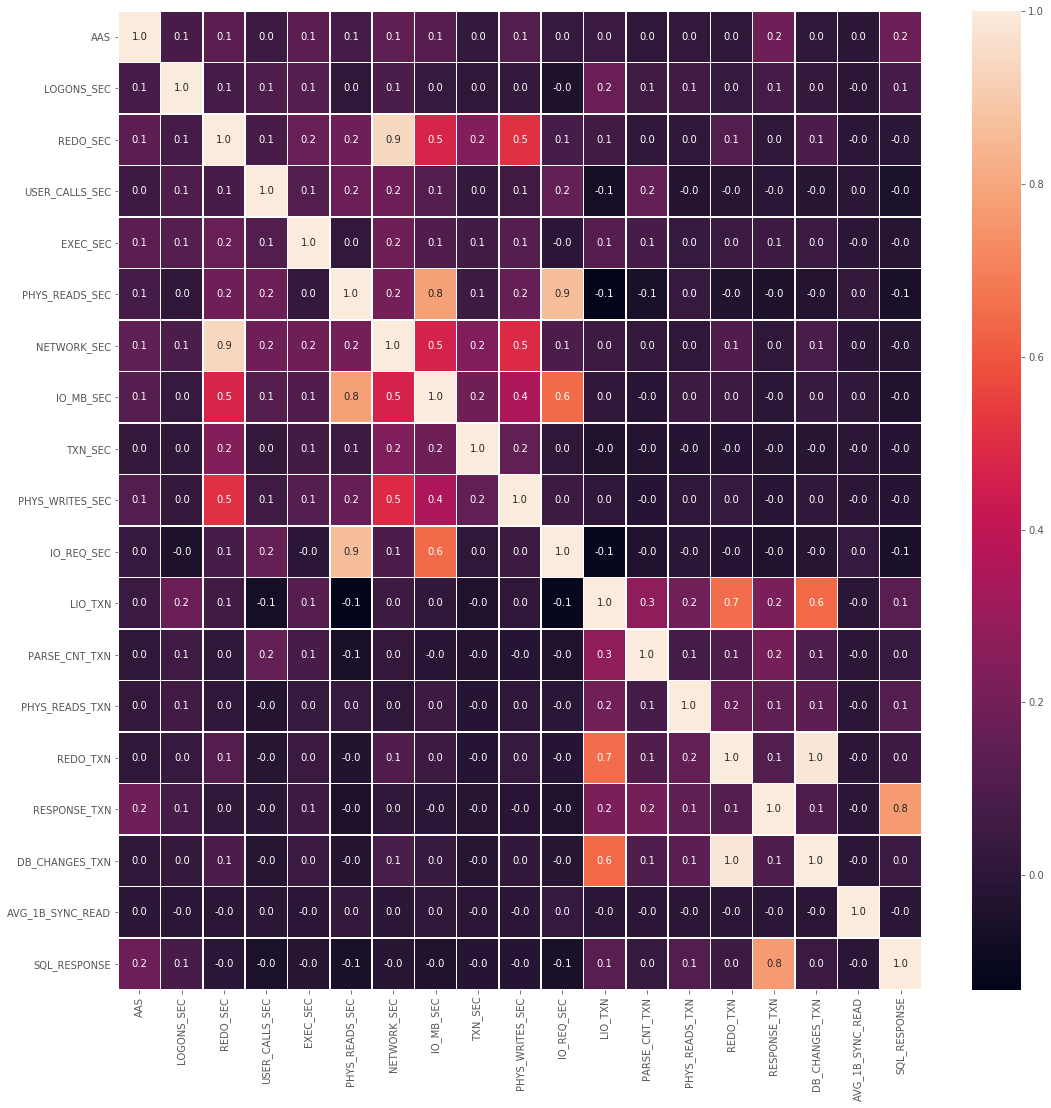

In [8]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df_db_times.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

Text(0.5,1,'DB Time Log')

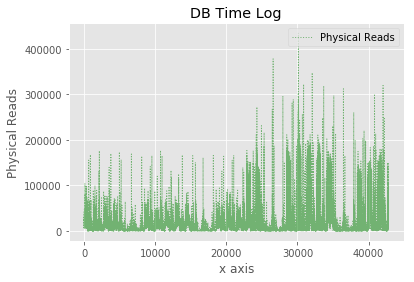

In [14]:
# Line Plot
# color = color, label = label, linewidth = width of line, alpha = opacity, grid = grid, linestyle = sytle of line
df_db_times.PHYS_READS_SEC.plot(kind = 'line', color = 'g',label = 'Physical Reads',linewidth=1,alpha = 0.5,grid = True,linestyle = ':')
#df_db_times.Defense.plot(color = 'r',label = 'Defense',linewidth=1, alpha = 0.5,grid = True,linestyle = '-.')
plt.legend(loc='upper right')     # legend = puts label into plot
plt.xlabel('x axis')              # label = name of label
plt.ylabel('Physical Reads')
plt.title('DB Time Log')            # title = title of plot

In [15]:
# Scatter Plot 
# x = attack, y = defense
df_db_times.plot(kind='scatter', x='BEGIN_TIME', y='PHYS_READS_SEC',alpha = 0.5,color = 'red')
plt.xlabel('BEGIN_TIME')              # label = name of label
plt.ylabel('PHYS_READS_SEC')
plt.title('DB TIME SHEET') 

ValueError: scatter requires x column to be numeric

In [17]:
df_db_times.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42781 entries, 0 to 42780
Data columns (total 20 columns):
BEGIN_TIME          42781 non-null object
AAS                 42781 non-null float64
LOGONS_SEC          42781 non-null float64
REDO_SEC            42781 non-null float64
USER_CALLS_SEC      42781 non-null float64
EXEC_SEC            42781 non-null float64
PHYS_READS_SEC      42781 non-null float64
NETWORK_SEC         42781 non-null float64
IO_MB_SEC           42781 non-null float64
TXN_SEC             42781 non-null float64
PHYS_WRITES_SEC     42781 non-null float64
IO_REQ_SEC          42781 non-null float64
LIO_TXN             42781 non-null float64
PARSE_CNT_TXN       42781 non-null float64
PHYS_READS_TXN      42781 non-null float64
REDO_TXN            42781 non-null float64
RESPONSE_TXN        42781 non-null float64
DB_CHANGES_TXN      42781 non-null float64
AVG_1B_SYNC_READ    42781 non-null float64
SQL_RESPONSE        42781 non-null float64
dtypes: float64(19), object(1)
m

In [53]:
#df_db_times['TIMESTAMP'] = time.mktime(parser.parse(df_db_times['BEGIN_TIME']).timetuple())
from dateutil import parser
import time

def date_str_to_seconds (date_str):
    dt = parser.parse(date_str)
    seconds = time.mktime(dt.timetuple())
    return(seconds)

print(date_str_to_seconds ('01-MAY-2018 09:16:00'))


1525180560.0


In [54]:
df_db_times['TIMESTAMP'] = df_db_times.apply (lambda row: date_str_to_seconds (row['BEGIN_TIME']), axis=1)

In [55]:
df_db_times.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42781 entries, 0 to 42780
Data columns (total 21 columns):
BEGIN_TIME          42781 non-null object
AAS                 42781 non-null float64
LOGONS_SEC          42781 non-null float64
REDO_SEC            42781 non-null float64
USER_CALLS_SEC      42781 non-null float64
EXEC_SEC            42781 non-null float64
PHYS_READS_SEC      42781 non-null float64
NETWORK_SEC         42781 non-null float64
IO_MB_SEC           42781 non-null float64
TXN_SEC             42781 non-null float64
PHYS_WRITES_SEC     42781 non-null float64
IO_REQ_SEC          42781 non-null float64
LIO_TXN             42781 non-null float64
PARSE_CNT_TXN       42781 non-null float64
PHYS_READS_TXN      42781 non-null float64
REDO_TXN            42781 non-null float64
RESPONSE_TXN        42781 non-null float64
DB_CHANGES_TXN      42781 non-null float64
AVG_1B_SYNC_READ    42781 non-null float64
SQL_RESPONSE        42781 non-null float64
TIMESTAMP           42781 non-nu

Text(0.5,1,'DB TIME SHEET')

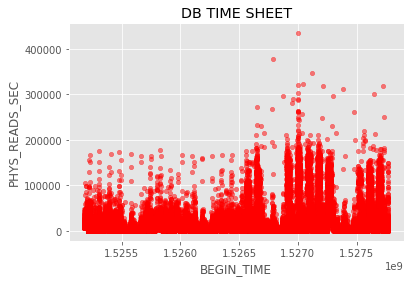

In [56]:
# Scatter Plot 
# x = attack, y = defense
df_db_times.plot(kind='scatter', x='TIMESTAMP', y='PHYS_READS_SEC',alpha = 0.5,color = 'red')
plt.xlabel('BEGIN_TIME')              # label = name of label
plt.ylabel('PHYS_READS_SEC')
plt.title('PHYS READS') 

Text(0.5,1,'NETWORK_SEC')

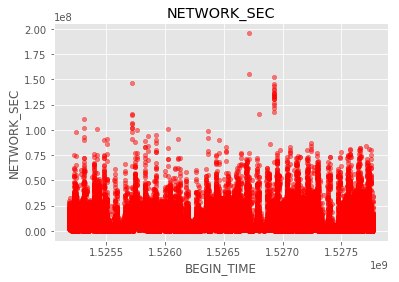

In [57]:
df_db_times.plot(kind='scatter', x='TIMESTAMP', y='NETWORK_SEC',alpha = 0.5,color = 'red')
plt.xlabel('BEGIN_TIME')              # label = name of label
plt.ylabel('NETWORK_SEC')
plt.title('NETWORK_SEC') 

Text(0.5,1,'PHYS_WRITES_SEC')

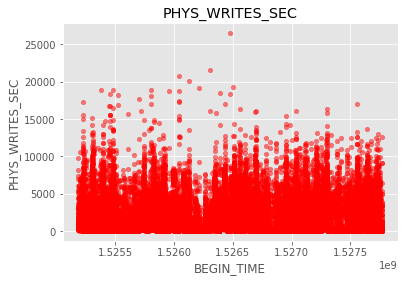

In [58]:
df_db_times.plot(kind='scatter', x='TIMESTAMP', y='PHYS_WRITES_SEC',alpha = 0.5,color = 'red')
plt.xlabel('BEGIN_TIME')              # label = name of label
plt.ylabel('PHYS_WRITES_SEC')
plt.title('PHYS_WRITES_SEC') 



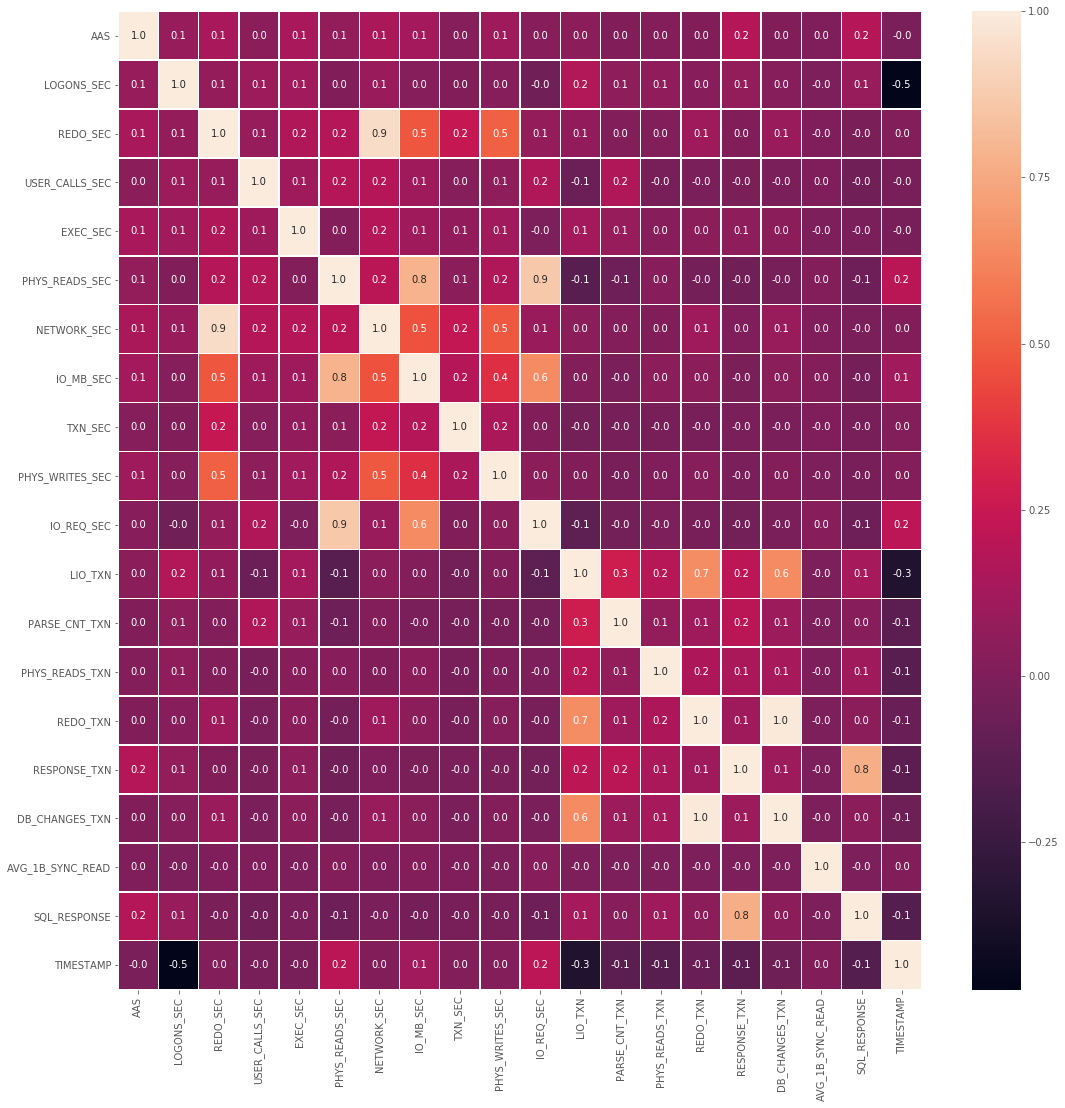

In [59]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df_db_times.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)